<a href="https://www.kaggle.com/code/joeferndz/supervised-machine-learning-models-insurance-data?scriptVersionId=141173349" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Related Notebooks Published
### EDA for Insurance Dataset is here

Thank You for visiting my notebook. If you are looking for EDA information, please review this notebook.

https://www.kaggle.com/code/joeferndz/exploratory-data-analysis-eda-insurance-dataset


### Tensorflow - Binary Cross Entropy is here:

https://www.kaggle.com/code/joeferndz/tensorflow-binarycrossentropy-tensorboard

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imbalanced-data-practice/sample_submission.csv
/kaggle/input/imbalanced-data-practice/aug_test.csv
/kaggle/input/imbalanced-data-practice/aug_train.csv


## Problem Statement

### Context :

Insurance companies that sell life, health, and property and casualty insurance are using machine learning (ML) to drive improvements in customer service, fraud detection, and operational efficiency. The data provided by an Insurance company which is not excluded from other companies to getting advantage of ML. This company provides Health Insurance to its customers. We can build a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

### Goal : Predict if the policyholders (customers) will be interested in Vehicle Insurance

Reference: https://www.kaggle.com/datasets/arashnic/imbalanced-data-practice

## Task:

> #### 1. Perform an Exploratory Data Analysis and visualize the data
> #### 2. Apply Machine Learning Models learned in the class and make predictions
> #### 3. Provide conclusion based on the results
> #### 4. Outline an approach to convert the learning into a business solution
> 
## Available Datasets:
> Use `aug_train.csv` as Training dataset to apply various ML models
>
> Use `aug_test.csv` as Test dataset to validate the accuracy of the ML models 

## Detailed EDA here

If you are looking for a detailed EDA, please visit this link.

https://www.kaggle.com/code/joeferndz/exploratory-data-analysis-eda-insurance-dataset

I will be doing basic EDA and going directly into feature engineering in this notebook

## Packages Loaded

In [2]:
# Import required Python Packages to perform exploratory data analysis and visualize the data
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import randint

# To split the dataset into Training and Test dataset
# We will NOT use the given aug_test.csv file in this notebook
# If you want to use that, please feel free to explore more with that dataset
# I will provide enough information for you to explore that dataset

from sklearn.model_selection import train_test_split

# To calculate statistics of the model

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

# For Feature Engineering tasks

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# sklearn Models that will be used in this notebook

# Supervised Machine Learning Models

from sklearn import linear_model                         # Linear regression
from sklearn.linear_model import LogisticRegression      # Logistic regression

from sklearn.neighbors import KNeighborsClassifier       # K Nearest Neighbor Classifier

# Trees , Forests, and more Trees for us to explore

from sklearn.tree import DecisionTreeClassifier          # Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier      # Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV   # Randomized Search CV for Hyperparameter tuning
from sklearn.ensemble import ExtraTreesClassifier        # Extra Tree Classifier

# 
from sklearn.naive_bayes import GaussianNB               # Naive Bayes Classifier

For quick reference, here is a very good view of some of the various machine learing models

For source: Pleaes refer to AnalyticsVidya (https://www.analyticsvidhya.com). 

I have learned a great deal from their website. It has a wealth of information for you to explore.

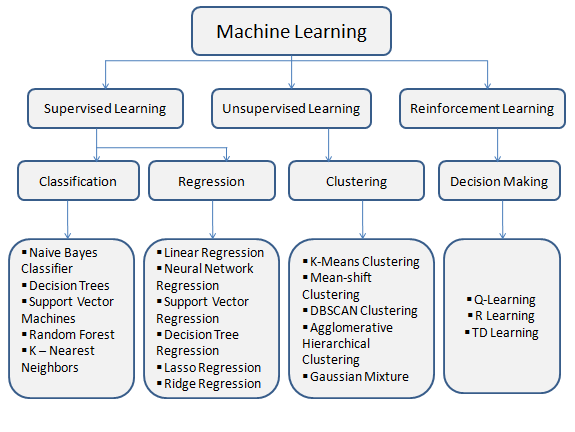

Reference : https://www.analyticsvidhya.com/blog/2021/03/everything-you-need-to-know-about-machine-learning/

## Read into Pandas DataFrame

In [3]:
# Let's load the data into Pandas Dataframe

df_train = pd.read_csv("/kaggle/input/imbalanced-data-practice/aug_train.csv")

df_train_copy = df_train.copy(deep=True)

## Basic Checks on Dataframe

In [4]:
# Let's look at the first 10 rows
df_train.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,Male,22,1,7.0,1,< 1 Year,No,2630.0,152.0,16,0
1,17163,Male,42,1,28.0,0,1-2 Year,Yes,43327.0,26.0,135,0
2,32023,Female,66,1,33.0,0,1-2 Year,Yes,35841.0,124.0,253,0
3,87447,Female,22,1,33.0,0,< 1 Year,No,27645.0,152.0,69,0
4,501933,Male,28,1,46.0,1,< 1 Year,No,29023.0,152.0,211,0
5,295775,Female,25,1,25.0,1,< 1 Year,No,27954.0,152.0,23,0
6,71711,Male,51,1,8.0,0,1-2 Year,Yes,2630.0,26.0,209,0
7,331781,Male,38,1,28.0,1,1-2 Year,No,2630.0,26.0,51,0
8,290704,Female,45,1,28.0,0,1-2 Year,Yes,55873.0,124.0,262,0
9,344792,Male,42,1,28.0,0,1-2 Year,Yes,27801.0,122.0,217,1


In [5]:
# Let's look at the bottom 10 rows
df_train.tail(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
382144,340265,Male,24,1,49.0,0,< 1 Year,Yes,2630.0,160.0,273,0
382145,213608,Female,25,1,6.0,1,< 1 Year,No,22911.0,152.0,131,0
382146,157507,Male,56,1,17.0,0,1-2 Year,Yes,45936.0,124.0,244,0
382147,498091,Female,48,1,28.0,0,1-2 Year,Yes,42805.0,26.0,80,1
382148,89317,Male,47,1,43.0,0,1-2 Year,Yes,32774.0,124.0,105,0
382149,164549,Male,24,1,15.0,0,< 1 Year,Yes,23938.0,152.0,105,0
382150,247064,Male,27,1,28.0,1,< 1 Year,No,336395.0,152.0,144,0
382151,165293,Male,45,1,28.0,0,1-2 Year,Yes,40443.0,26.0,187,0
382152,383241,Female,28,1,28.0,1,< 1 Year,No,25380.0,152.0,208,0
382153,401019,Female,29,1,18.0,1,< 1 Year,No,30396.0,152.0,104,0


In [6]:
# Let's find out the total number of rows and columns in this dataframe
df_train.shape

(382154, 12)

There are 382,154 rows and 12 columns in this Insurance Analysis dataset

In [7]:
# Let's explore the columns in the dataframe
df_train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [8]:
# Let's also explore the data types and other details for this dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382154 entries, 0 to 382153
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    382154 non-null  int64  
 1   Gender                382154 non-null  object 
 2   Age                   382154 non-null  int64  
 3   Driving_License       382154 non-null  int64  
 4   Region_Code           382154 non-null  float64
 5   Previously_Insured    382154 non-null  int64  
 6   Vehicle_Age           382154 non-null  object 
 7   Vehicle_Damage        382154 non-null  object 
 8   Annual_Premium        382154 non-null  float64
 9   Policy_Sales_Channel  382154 non-null  float64
 10  Vintage               382154 non-null  int64  
 11  Response              382154 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 35.0+ MB


## Statistics about the data

In [9]:
# Get statistical data for all the numerical features

df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,382154.0,234392.953477,139527.487326,1.0,115006.25,230461.5,345434.75,508145.0
Age,382154.0,38.545691,15.226897,20.0,25.00,36.0,49.00,85.0
Driving_License,382154.0,0.998108,0.043455,0.0,1.00,1.0,1.00,1.0
Region_Code,382154.0,26.406867,13.181241,0.0,15.00,28.0,35.00,52.0
Previously_Insured,382154.0,0.489182,0.499884,0.0,0.00,0.0,1.00,1.0
Annual_Premium,382154.0,30711.271362,17061.595532,2630.0,24546.00,31692.0,39447.75,540165.0
Policy_Sales_Channel,382154.0,111.939812,54.286511,1.0,26.00,145.0,152.00,163.0
Vintage,382154.0,154.189429,83.735107,10.0,81.00,154.0,227.00,299.0
Response,382154.0,0.163811,0.370104,0.0,0.00,0.0,0.00,1.0


In [10]:
# Get statistical data for all the Categorical features

df_train.describe(include=['O']).T

,count,unique,top,freq
Gender,382154,2,Male,205603
Vehicle_Age,382154,3,1-2 Year,200176
Vehicle_Damage,382154,2,No,198501


## Feature Engineering

## Check for Nulls

In [11]:
# Check if each column has any null values

df_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

All data elements have values. There are no nulls. Let's perform some feature engineering and prepare our dataset for machine learning models

## Numerical and Categorical Features

In [12]:
# Identify all numerical features and categorical features

# Numerical Features:
numerical_features = df_train.select_dtypes(exclude=['object']).columns.tolist()
print('The numerical features in the Insurance Dataset are:')
print(numerical_features)

# Categorical Features:

categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()
print('\nThe Categorical features in the Insurance Dataset are:')
print(categorical_features)

The numerical features in the Insurance Dataset are:
['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 'Response']

The Categorical features in the Insurance Dataset are:
['Gender', 'Vehicle_Age', 'Vehicle_Damage']


### Convert Categorical Features
Convert all Categorical features using encoders

In [13]:
# Let's perform some transformation on categorical features

# make an instance of Label Encoder
label_encoder = LabelEncoder()

# transform 'Gender' from Object to Numeric using fit_transform
df_train['Gender'] = label_encoder.fit_transform(df_train['Gender'])

# transform 'Vehicle_Age' from Object to Numeric using fit_transform
df_train['Vehicle_Age'] = label_encoder.fit_transform(df_train['Vehicle_Age'])

# transform 'Vehicle_Damage' from Object to Numeric using fit_transform
df_train['Vehicle_Damage'] = label_encoder.fit_transform(df_train['Vehicle_Damage'])

# Let's look at the top 10 rows to see how the transformation helped
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,167647,1,22,1,7.0,1,1,0,2630.0,152.0,16,0
1,17163,1,42,1,28.0,0,0,1,43327.0,26.0,135,0
2,32023,0,66,1,33.0,0,0,1,35841.0,124.0,253,0
3,87447,0,22,1,33.0,0,1,0,27645.0,152.0,69,0
4,501933,1,28,1,46.0,1,1,0,29023.0,152.0,211,0


## Plot Graphs - Histogram

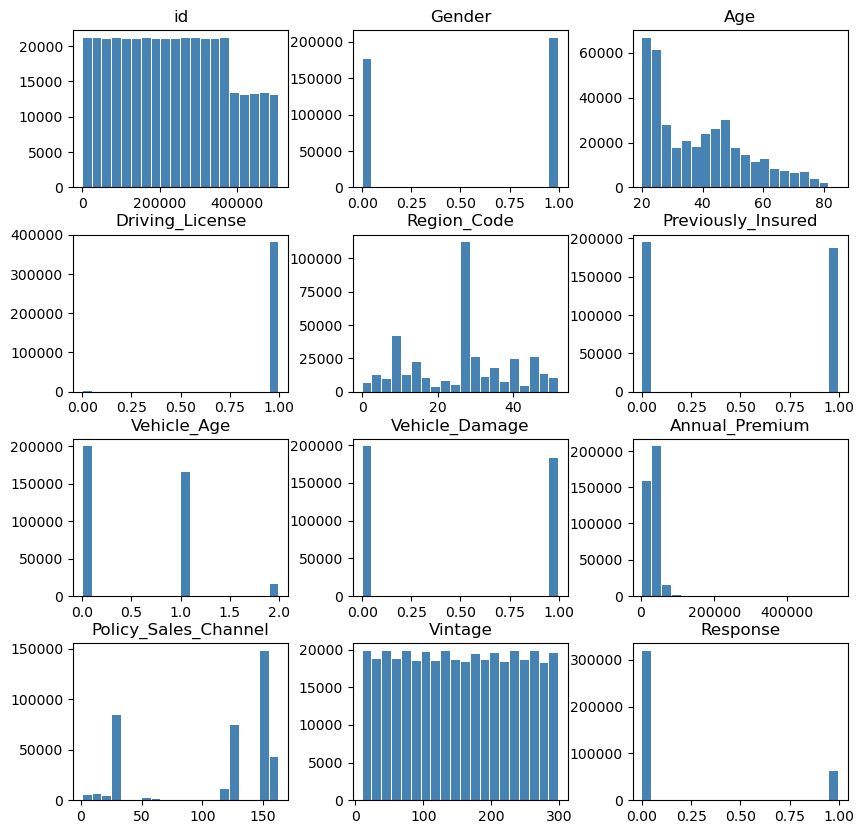

In [14]:
df_train.hist(column=df_train.columns, 
              color='steelblue', # many options, some to consider are
                            # ['aqua', 'red', 'gold', 'royalblue', 
                            #'darkorange', 'green', 'purple', 
                            #'steelblue', 'yellow', 'lime', 'magenta']
              #edgecolor='black', # color of the edge line for the bars
              figsize=(10,10), #(x axis and y axis in inches)
              bins=20, # number of bins to divide the data into
              rwidth=0.9, # width between each bin
              grid=False # to remove the grid for cleaner visualization
             )
plt.show()

## Zoom into Annual Premium Feature

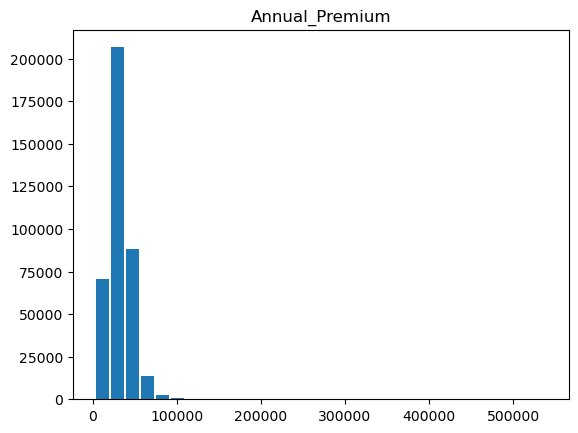

In [15]:
# Zoom into the Annual Premium for all the customers

df_train.hist(column=['Annual_Premium'], 
               bins = 30,
               rwidth=0.9, # width between each bin
               grid=False # to remove the grid for cleaner visualization
              )
plt.show()

Looks like Annual Premium feature is right skewed. We should remove the outliers for better predictions

In [16]:
# We know Annual Premium is skewed. Let's create a function to bin the values into a group
# We will convert the premium to a series of numbers. This will help us with better analysis
# For ex: 0-999 will be 1; 1,000 - 1,999 will be 2, .... until 99,000 - 99,999 will be 100
# all others values above 99,999 will be set to 999

#def bin_annual_premium(row_val):
#    if  row_val >= 100000:
#        return 999
#    else:
#        x = int((row_val // 1000) + 1)
#        return x
#    
#df_train['Bins'] = df_train['Annual_Premium'].apply(bin_annual_premium)
#
#df_train.groupby('Bins').count()['Annual_Premium']

In [17]:
# Based on the histogram, it looks like we can easily eliminate all the outliers beyond 100,000
df_train = df_train.loc[df_train['Annual_Premium'] < 100000]
df_train.shape

(381361, 12)

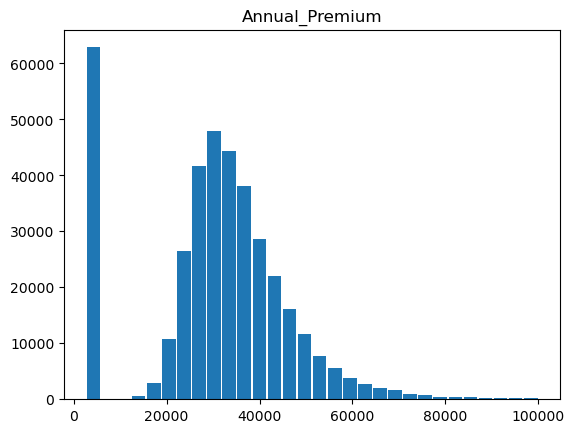

In [18]:
# Zoom into the Annual Premium for all the customers

df_train.hist(column=['Annual_Premium'], 
               bins = 30,
               rwidth=0.9, # width between each bin
               grid=False # to remove the grid for cleaner visualization
              )
plt.show()

## Plot Graphs - Boxplot

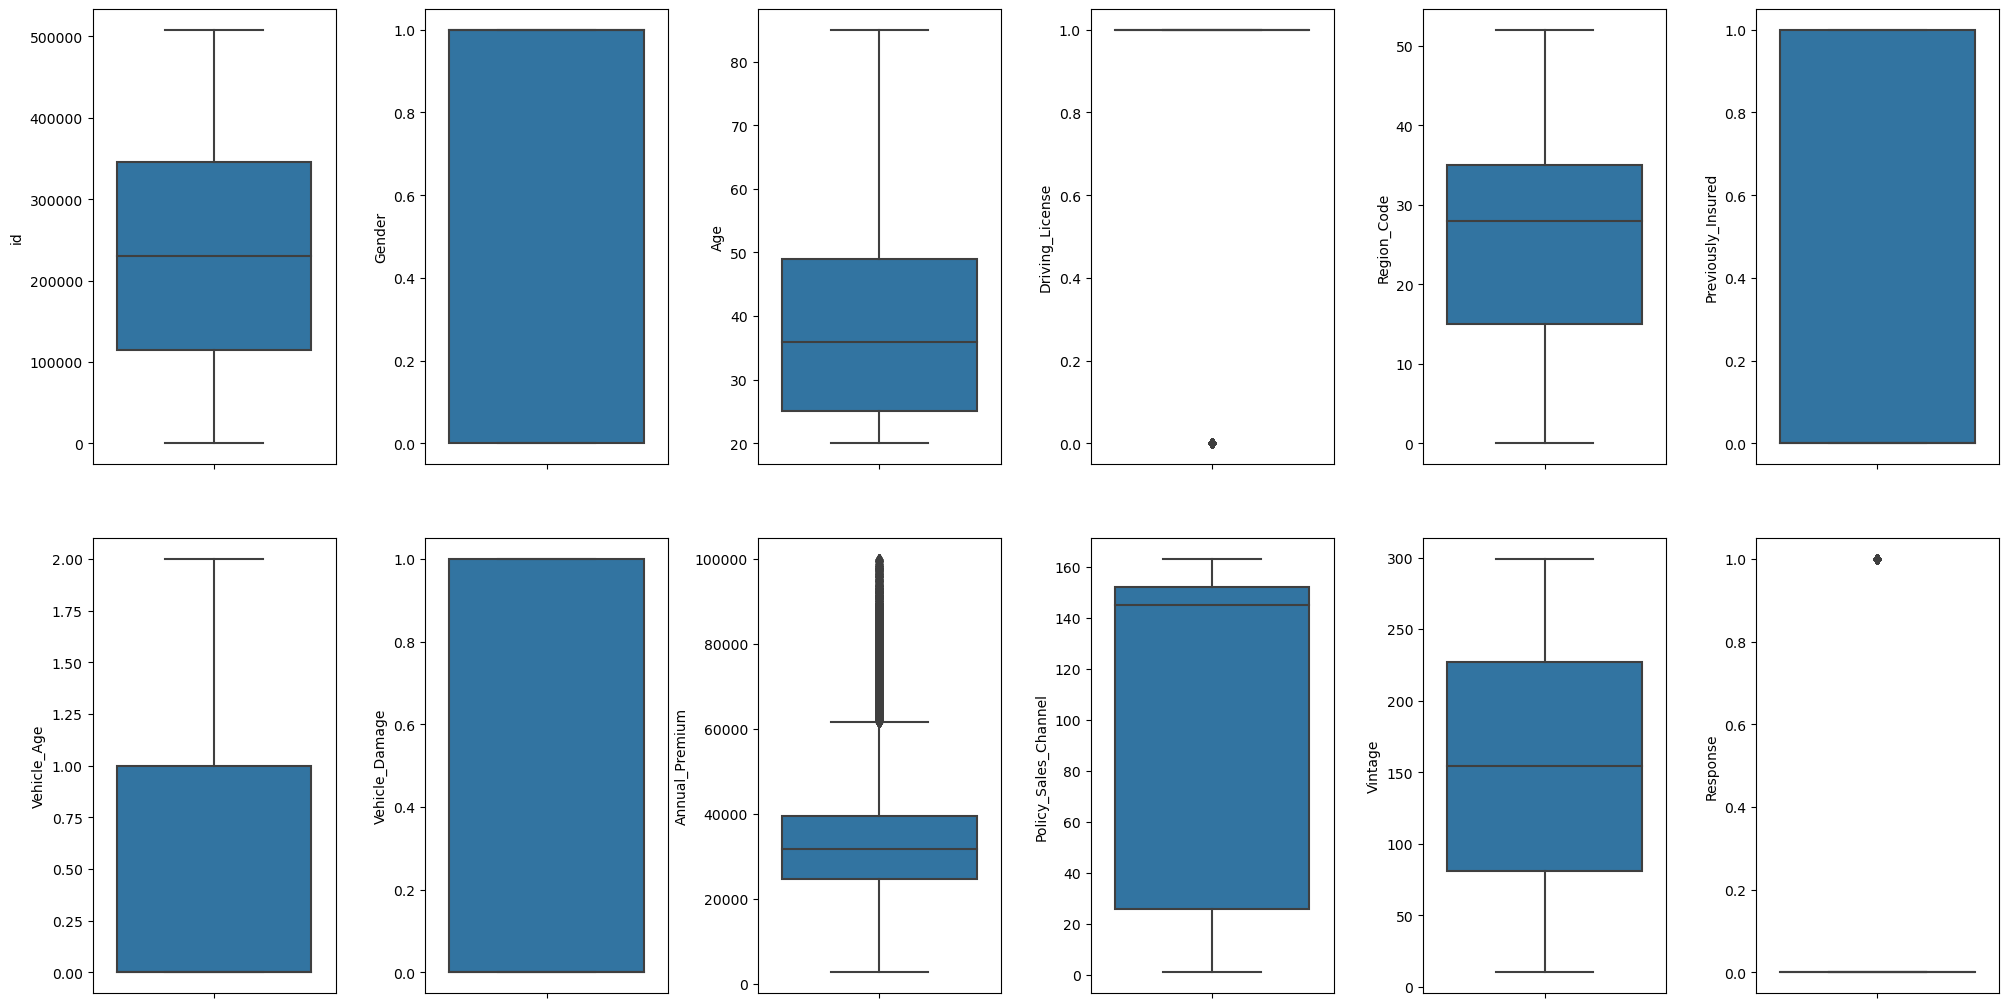

In [19]:
# We now have all the columns as numeric. So we can plot a boxplot on all columns.
# We have 12 columns. So let's split them into two rows of 6 columns to display the boxplot

fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df_train.items():
    sns.boxplot(y=k, data=df_train, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

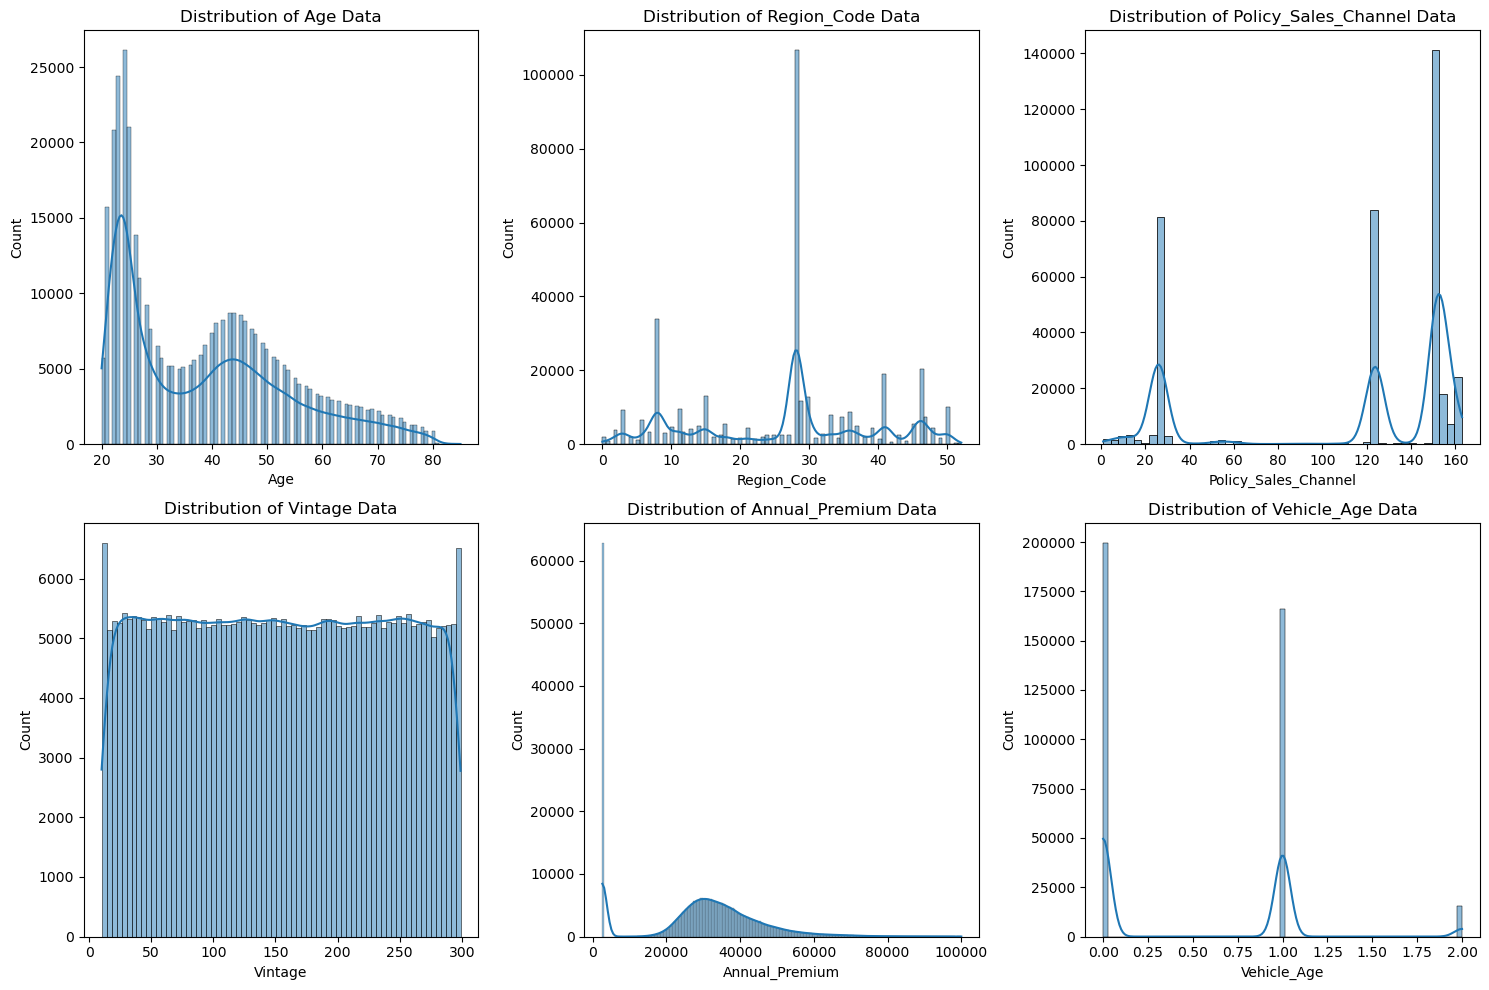

In [20]:
# Let's also plot the distribution grap and look at the skewness of the feature 
# using the Kernel Density Estimate (kde)

# We already know that some columns are not really skewed as they have very few values. 
# Let's exclude them from KDE analysis

# Columns being excluded are: 
# Id (each row is unique so it does not make sense to do distribution), 
# Gender (only two values, so no real distribution), 
# Driving License. It is either 0 or 1,
# Previously Insured. It is either 0 or 1
# Vehicle Damage. It is either 0 or 1
# Response. It is either 0 or 1

# This leaves us with only 5 columns. So we can plot these 3 in one row
# We have 4 features. Let's plot them on a 3x2 subplot

# Columns being plotted are:
# Age, Region_Code, Policy_Sales_Channel, Premium_Bin, Vehicle_Age, and Vintage

col_list = ['Age', 'Region_Code', 'Policy_Sales_Channel', 
            'Vintage', 'Annual_Premium','Vehicle_Age']

plt.figure(figsize=(15,10))
for i,col in enumerate(col_list,1):
    plt.subplot(2,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df_train[col],kde=True)
    plt.tight_layout()
    plt.plot()

## Plot Graphs - Violin Plot

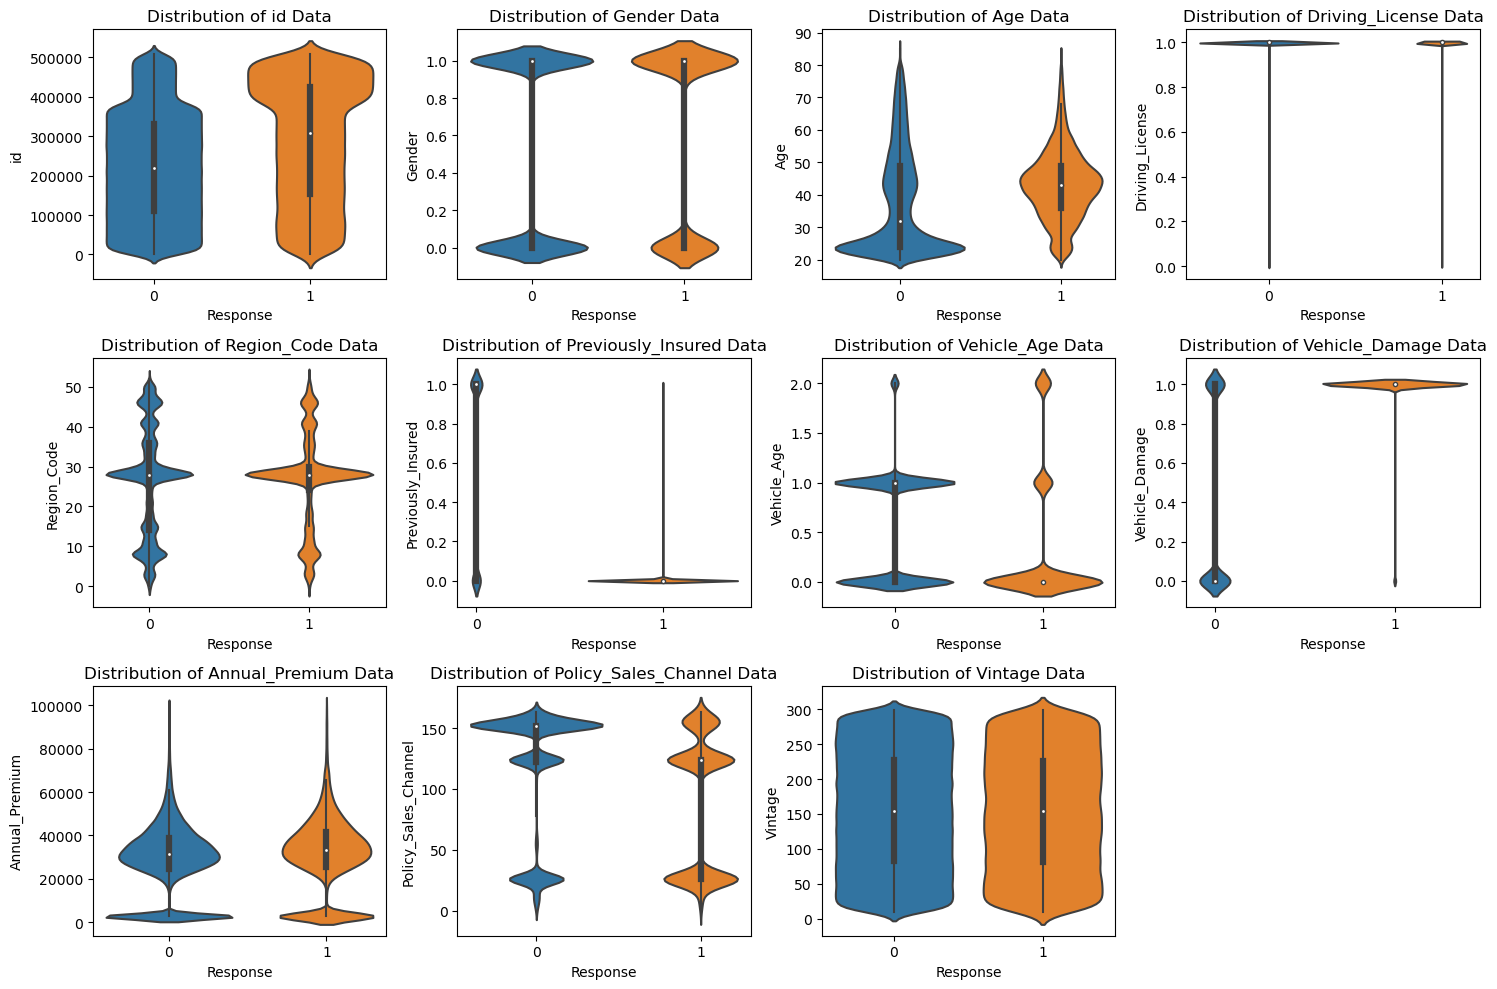

In [21]:
# We know that some features are contributing to the decision whether the customer will
# purchase vehicle insurance or now.
# Let's plot a Violin plot to see the data in comparison with 'Response' column
# We have 12 attributes with 1 attribute as 'Response'. 
# Let's plot the violin graph excluding the 'Response' column
# Plotting in a 3x4 matrix

plt.figure(figsize=(15,10))
for i,col in enumerate(df_train.columns,1):
    if col=='Response': continue
    plt.subplot(3,4,i)
    plt.title(f"Distribution of {col} Data")
    sns.violinplot(data=df_train, x='Response', y=df_train[col])
    plt.tight_layout()
    plt.plot()

## Pairwise Correlation

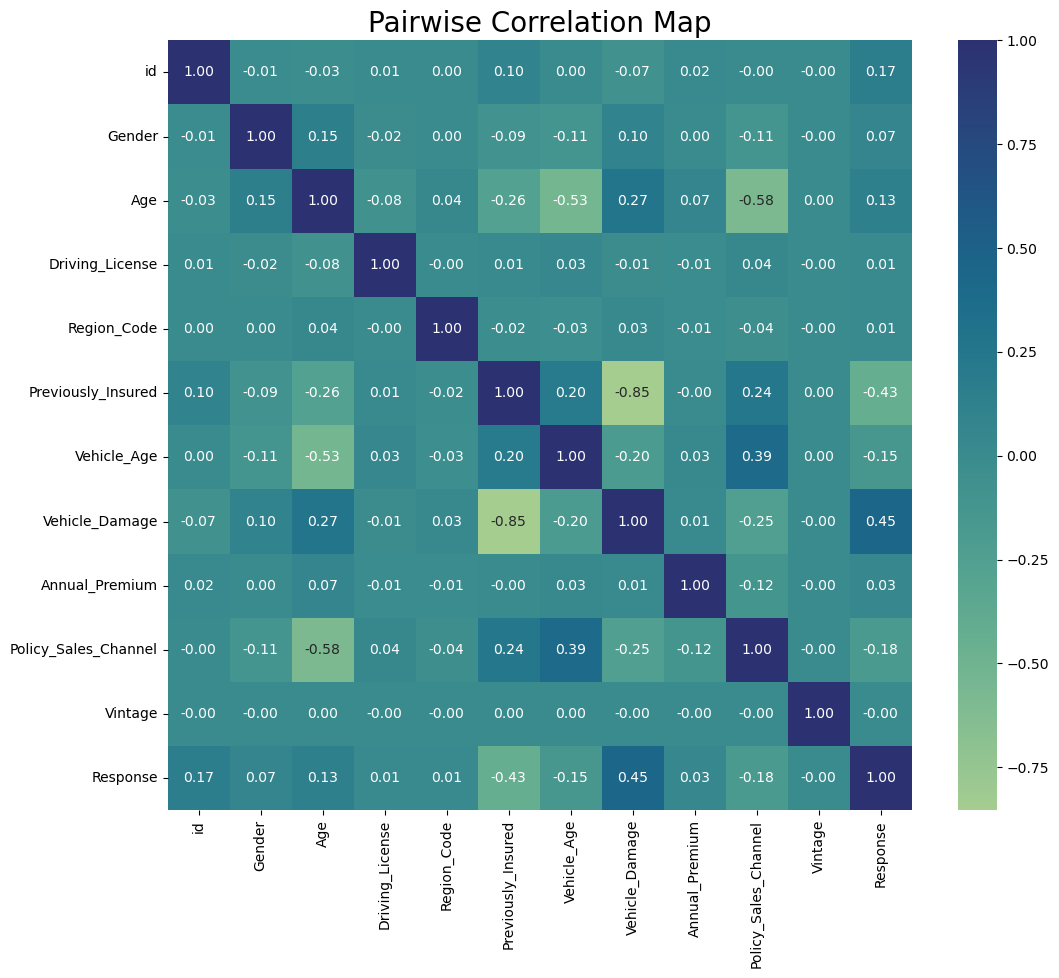

In [22]:
# Having analyzed all the data, let's revisit the pairwise correlation mapping 

plt.figure(figsize=(12,10))
sns.heatmap(df_train.corr(),annot=True,fmt='.2f', cmap='crest')
plt.title('Pairwise Correlation Map', size = 20)
plt.show()

## Machine Learning Models 

We will apply the following Machine Learning Models on the df_train dataset

Supervised Machine Learning Models:

- K-nearest neighbors (KNN) 
- Logistic Regression
- Decision Tree Classifier
- Random Forest Classifier
- Randomized Search CV
- Extra Tree Classifier
- Gaussian Naive Bayes 

## Function to Record and Print Scores

### Define a function to do the following:

- Capture the following key details:

- Model Name`
    - `Accuracy Score` : accuracy_score(y_true, y_pred_class)
    - `ROC AUC       ` : roc_auc_score(y_true, y_pred_pos)
    - `F1 Score      ` : f1_score(y_true, y_pred_class)
    
- Calculate the Confusion Matrix
- Plot the Confusion Matrix
- Print the Classification Report
- Print the Accuracy Score, ROC AUC Score, and F1 Score
- Plot the ROC AUC Curve for the model

In [23]:
# Define the variables to capture the values for each model run

models = []
accuracy_values = []
roc_auc_values = []
f1_score_values = []

In [24]:
# Define a function to do the following:

# Calculate the confusion matrix and the scores for the given model
# We will calculate the Confusion Matrix, Accuracy Score, ROC Score, and F1 Score

def record_and_print_scores(model_name, test_result, pred_result, proba_val):

    # Calculate the Confusion Matrix
    
    print(f'\nConfusion Matrix for {model_name}\n')
    
    cm = confusion_matrix(test_result, pred_result)
    
    tn, fp, fn, tp = cm.ravel()

    print(f'True Negative  : {tn}\nFalse Positive : {fp}\nFalse Negative : {fn}\nTrue Positive  : {tp}')
    
    # Plot the Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for {model_name}\n')
    plt.show()
    

    print(f'\nClassification Report for {model_name}\n\n')
    
    # Print the Classification Report
    print(classification_report(test_result, pred_result))

    # Print the Accuracy, ROC AUC, and F1 Scores
    x_acc_score = accuracy_score(test_result, pred_result)
    x_roc_acu = roc_auc_score(test_result, pred_result)
    x_f1_score = f1_score(test_result, pred_result)
    
    print(f'\n\nResults for {model_name}\n\n')
    print(f'Accuracy is: {x_acc_score:.2f}')
    print(f'ROC AUC is : {x_roc_acu:.2f}')
    print(f'F1 Score is : {x_f1_score:.2f}')

    # Capture the Accuracy, ROC AUC, and F1 Score to summarize in the end
    
    models.append(model_name) 
    accuracy_values.append(x_acc_score)
    roc_auc_values.append(x_roc_acu)
    f1_score_values.append(x_f1_score)
    
    # Plot the ROC Curve
    
    print(f'\nROC Curve for {model_name}\n\n')
    
    fpr, tpr, threshold = roc_curve(test_result, proba_val)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' %x_roc_acu)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {model_name}\n')
    plt.legend(loc="lower right")
    plt.show()

## Numerical Features

In [25]:
# Identify all numerical features and categorical features

# Numerical Features:
X = df_train.drop(['Response'], axis=1)

numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()
print('The numerical features in the Insurance Dataset are:')
print(numerical_features)

The numerical features in the Insurance Dataset are:
['id', 'Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']


## Train Test Split

In [26]:
# Let's to a Train Test split at 80% for train and 20% for test

scaler = StandardScaler()

x = np.array(scaler.fit_transform(X))
y = np.array(df_train['Response']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

## K-Nearest Neighbor

KNN is a supervised classification algorithm that classifies new data points based on the nearest data points. On the other hand, K-means clustering is an unsupervised clustering algorithm that groups data into a K number of clusters

Reference: https://learn.g2.com/k-nearest-neighbor

To find a optimal number of neighbors, we will build different models with different values for neighbors and then plot K vs the accuracy. 

In [27]:
# Let's run the KNN model for 10 k values

k_range = range(1, 10)
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, np.ravel(y_train))
    y_pred = knn.predict(X_test)
    scores_list.append(accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Test Accuracy')

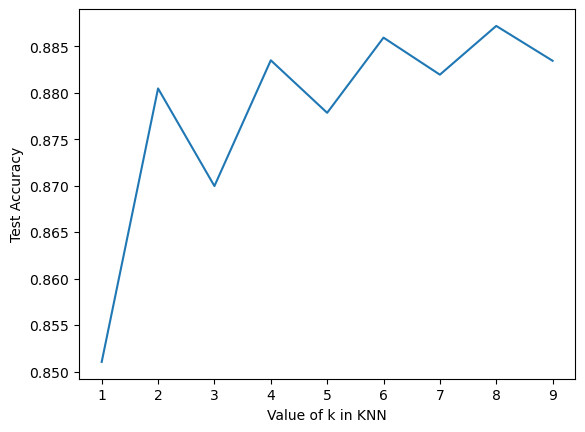

In [28]:
plt.plot(k_range, scores_list)
plt.xlabel("Value of k in KNN")
plt.ylabel("Test Accuracy")

In [29]:
for i, v in enumerate(scores_list): print (f'Test Accuracy for iteration K={i+1} is {v:.3f}')

Test Accuracy for iteration K=1 is 0.851
Test Accuracy for iteration K=2 is 0.880
Test Accuracy for iteration K=3 is 0.870
Test Accuracy for iteration K=4 is 0.883
Test Accuracy for iteration K=5 is 0.878
Test Accuracy for iteration K=6 is 0.886
Test Accuracy for iteration K=7 is 0.882
Test Accuracy for iteration K=8 is 0.887
Test Accuracy for iteration K=9 is 0.883


### Observations from K vs Accuracy plot

From the above plot, we can observe that for most part as K increases, the accuracy icnreases. 
When 

For K=2, K=4, and K=6 the accuracy is between 88% and 89% 

For K=3, accuracy dips below to 87%

For K=8, the accuracy goes to the max value of 88.7%, which is only 0.7% more than when K=2.

Since KNN is computationally expensive, we will consider K=2 as an optimal value.

In [30]:
# from the above plot, we can say that k=2 gives the best accuracy
# We also know that there are only two values that we need, 0 (not interested) or 1 (interested in Vehicle Premium). 
# We should build a model with 2 neighbors

knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, np.ravel(y_train))
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)[:,1]


Confusion Matrix for K Nearest Neighbor with K=2

True Negative  : 62109
False Positive : 1600
False Negative : 7518
True Positive  : 5046


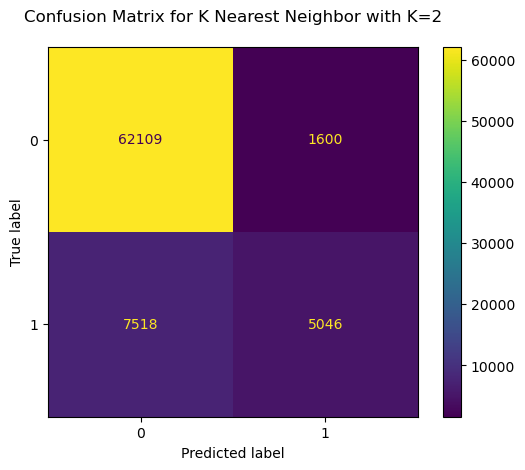


Classification Report for K Nearest Neighbor with K=2


              precision    recall  f1-score   support

           0       0.89      0.97      0.93     63709
           1       0.76      0.40      0.53     12564

    accuracy                           0.88     76273
   macro avg       0.83      0.69      0.73     76273
weighted avg       0.87      0.88      0.86     76273



Results for K Nearest Neighbor with K=2


Accuracy is: 0.88
ROC AUC is : 0.69
F1 Score is : 0.53

ROC Curve for K Nearest Neighbor with K=2




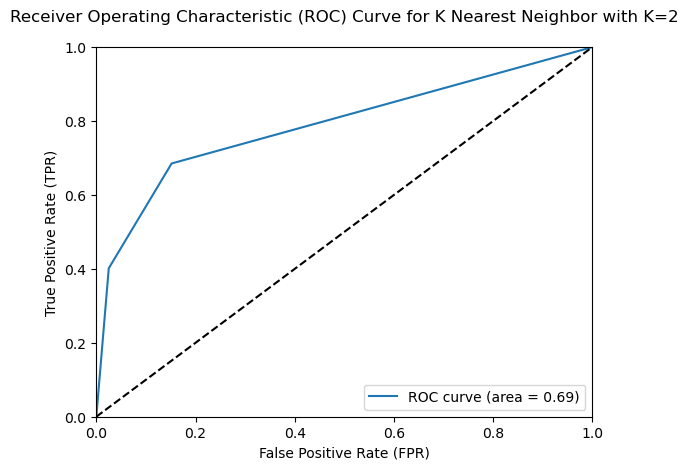

In [31]:
# Call the function record and plot the Confusion Matrix and ROC Curve

record_and_print_scores('K Nearest Neighbor with K=2', y_test, y_pred, y_pred_proba)

In general, an AUC of 0.5 suggests no discrimination (i.e., in the case of customers willing to purchase Vehicle Insurance, the results with a value of 0.5 suggests no discrimination in the ability to determine either willing to purchase or not based on the test), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.

From the ROC Curve above, the area is 0.69 which is close to the acceptable range of 0.7 to 0.8. So we think this is a good match to consider for further analysis.

Reference: https://www.sciencedirect.com/science/article/pii/S1556086415306043

## Logistic Regression

Let's explore the other supervised learning models - Logistic Regression

In [32]:
# Let's define the Logistic Regression model with solver = lbfgs and C = 1

# Create an instance of Logistic Regression Model
LRmodel = LogisticRegression(penalty='l2', C=1, solver='lbfgs')

# Train the model using model.fit
LRmodel.fit(X_train, y_train)

# Predict the results for the Test data
y_pred = LRmodel.predict(X_test)

# Find the Prediction Probability of the Test data
y_pred_proba = LRmodel.predict_proba(X_test)[:,1]


Confusion Matrix for Logistic Regression

True Negative  : 61652
False Positive : 2057
False Negative : 7099
True Positive  : 5465


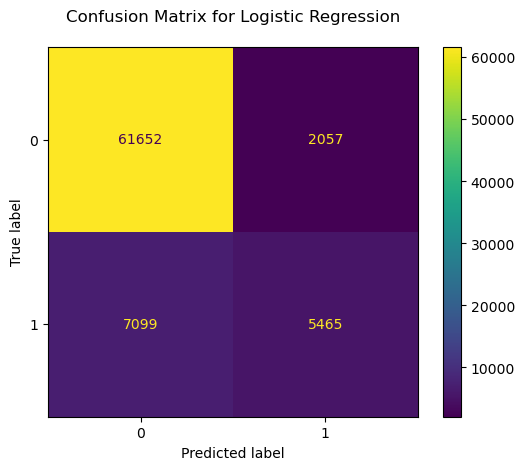


Classification Report for Logistic Regression


              precision    recall  f1-score   support

           0       0.90      0.97      0.93     63709
           1       0.73      0.43      0.54     12564

    accuracy                           0.88     76273
   macro avg       0.81      0.70      0.74     76273
weighted avg       0.87      0.88      0.87     76273



Results for Logistic Regression


Accuracy is: 0.88
ROC AUC is : 0.70
F1 Score is : 0.54

ROC Curve for Logistic Regression




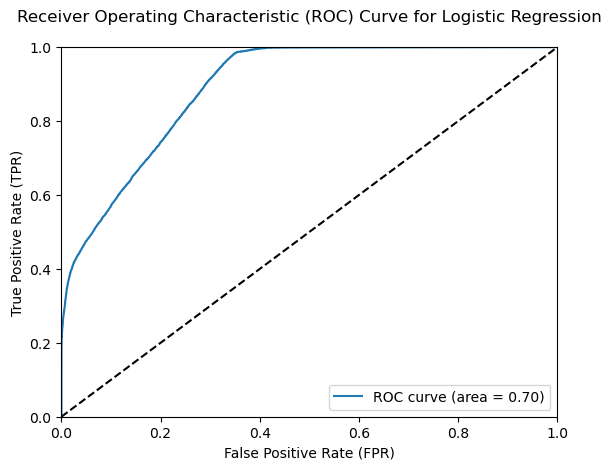

In [33]:
# Call the function record and plot the Confusion Matrix and ROC Curve

record_and_print_scores('Logistic Regression', y_test, y_pred, y_pred_proba)

The Logistic ROC Curve is 0.70. This is a good result to consider.

## Decision Tree Classifier
We will now explore Decision Tree Classifier model to see if this can help us get better results.

In [34]:
# Create the Model

dtree = DecisionTreeClassifier()

# Train and Fit the model using model.fit
dtree.fit(X_train, y_train)

# Predict the results for the Test data
y_pred = dtree.predict(X_test)

# Find the Prediction Probability of the Test data
y_pred_proba = dtree.predict_proba(X_test)[:,1]


Confusion Matrix for Decision Tree Classifier

True Negative  : 57788
False Positive : 5921
False Negative : 5388
True Positive  : 7176


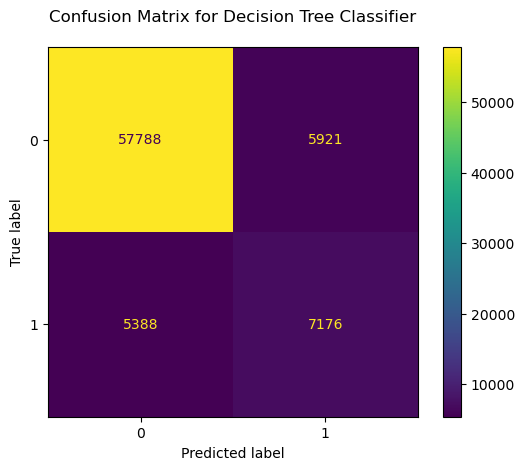


Classification Report for Decision Tree Classifier


              precision    recall  f1-score   support

           0       0.91      0.91      0.91     63709
           1       0.55      0.57      0.56     12564

    accuracy                           0.85     76273
   macro avg       0.73      0.74      0.74     76273
weighted avg       0.85      0.85      0.85     76273



Results for Decision Tree Classifier


Accuracy is: 0.85
ROC AUC is : 0.74
F1 Score is : 0.56

ROC Curve for Decision Tree Classifier




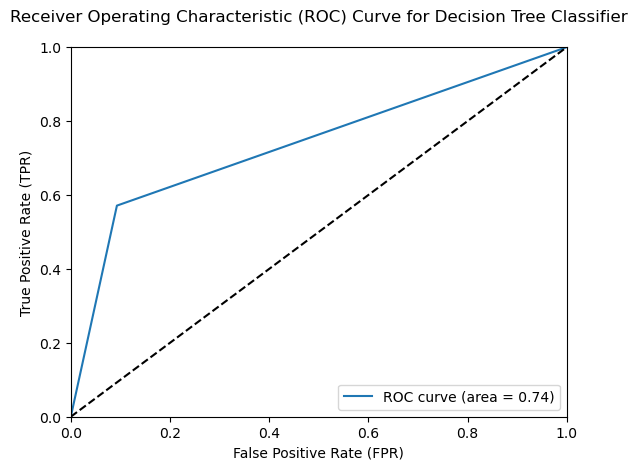

In [35]:
# Call the function record and plot the Confusion Matrix and ROC Curve

record_and_print_scores('Decision Tree Classifier', y_test, y_pred, y_pred_proba)

The Decision Tree Classifier ROC Curve is 0.74. This is a good result to consider.

## Random Forest Classifier
We will now explore Random Forest Classifier model to see if we can get better results.

In [36]:
# Create the Random Forest Classifier instance
rfc = RandomForestClassifier(n_estimators=100)

# Train and Fit the model using model.fit
rfc.fit(X_train, y_train)

# Predict the results for the Test data
y_pred = rfc.predict(X_test)

# Find the Prediction Probability of the Test data
y_pred_proba = rfc.predict_proba(X_test)[:,1]


Confusion Matrix for Random Forest Classifier

True Negative  : 62854
False Positive : 855
False Negative : 7274
True Positive  : 5290


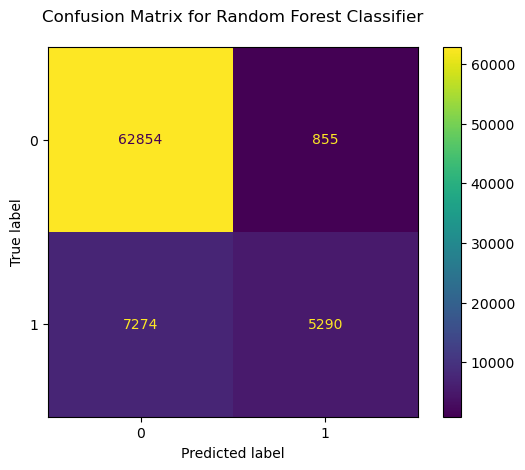


Classification Report for Random Forest Classifier


              precision    recall  f1-score   support

           0       0.90      0.99      0.94     63709
           1       0.86      0.42      0.57     12564

    accuracy                           0.89     76273
   macro avg       0.88      0.70      0.75     76273
weighted avg       0.89      0.89      0.88     76273



Results for Random Forest Classifier


Accuracy is: 0.89
ROC AUC is : 0.70
F1 Score is : 0.57

ROC Curve for Random Forest Classifier




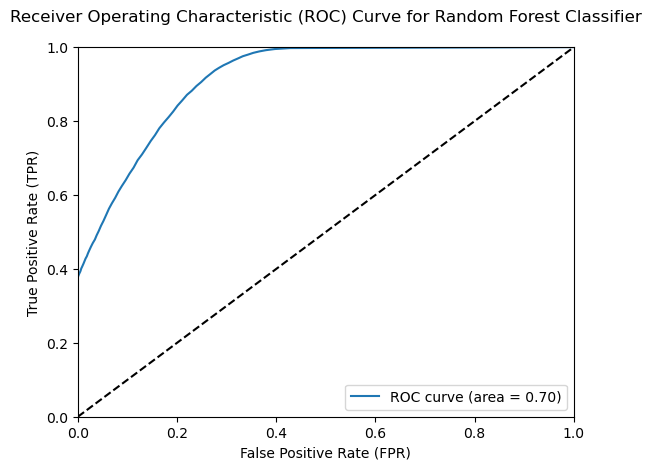

In [37]:
# Call the function record and plot the Confusion Matrix and ROC Curve

record_and_print_scores('Random Forest Classifier', y_test, y_pred, y_pred_proba)

The Random Forest Classifier ROC Curve is 0.71. This is a good result to consider.

In [38]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

To vizualize the data, you need to install graphviz. Please also make sure you have enabled graphviz on the Anaconda Navigator Environment to visuazlize the data. I had to go through a few tries to get all the setting done before I could vizualize the data.

For Mac, you can install from
https://ports.macports.org/port/graphviz/

For Windows, you can install from
https://www.graphviz.org/download/

In [ ]:
# Export the first three decision trees from the forest

for i in range(3):
    # To generate and export the graph use this
    
    tree_viz = rfc.estimators_[i]
    dot_data = export_graphviz(tree_viz,
                               feature_names=X.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=False, 
                               proportion=True)
    
    # To print the graph, you can use this
    graph = graphviz.Source(dot_data)
    display(graph)
    
    # To save the file into your local directory, use this
    fname = 'g' + str(i)+'.dot'
    graph.render(filename=fname)

## RandomizedSearchCV

### Best Hyperparameters: Use RandomizedSearchCV for hyper parameter tuning

Let's further explore the option with RandomizedSearchCV to see if selecting a different value for n_estimator and maxdepth can improve the AUC score.

`n_estimators`: the number of decision trees in the forest. Increasing this hyperparameter generally improves the performance of the model but also increases the computational cost of training and predicting.

`max_depth`: the maximum depth of each decision tree in the forest. Setting a higher value for max_depth can lead to overfitting while setting it too low can lead to underfitting.

For our experiment, let's use `n_estimators` with a range of 100 to 400, and `max_depth` with a range of 1 to 20.

This will be a costly run but let's do it in the name of "AI/ML Experiments".

Best hyperparameters: {'max_depth': 13, 'n_estimators': 148}
RandomForestClassifier(max_depth=13, n_estimators=148)


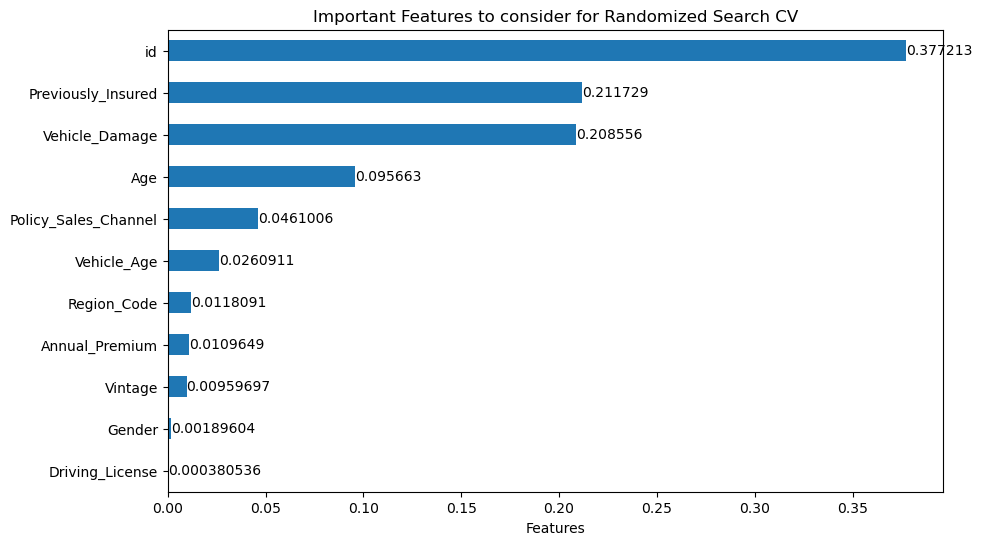

In [40]:
param_dist = {'n_estimators': randint(100,200),
              'max_depth': randint(1,20)}

# Create a random forest classifier
rfcSVC = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rfcSVC, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

# Fit the random search object to the data
rand_search.fit(X_train, y_train)

# Create a variable for the best model
best_rf = rand_search.best_estimator_

# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)
print(best_rf)

# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_rf.feature_importances_, 
                                index=X.columns).sort_values(ascending=True)

# Plot a simple bar chart
ax = feature_importances.plot(kind='barh', figsize=(10,6), grid=False)
ax.bar_label(ax.containers[0], color='black')
plt.title('Important Features to consider for Randomized Search CV')
plt.xlabel('Features')
plt.show()

Based on the results from the above, we now know the best features and the best hyper parameters to use. With the updated hyperparameters, let's perform perdiction

In [41]:
# Perform the Prediction based on best hyperparameters for Random Forest Classifier
y_best_rand_pred = rand_search.predict(X_test)

# Find the Prediction Probability of the Test data
y_pred_proba = rand_search.predict_proba(X_test)[:,1]


Confusion Matrix for RandomizedSearchCV

True Negative  : 62854
False Positive : 855
False Negative : 7274
True Positive  : 5290


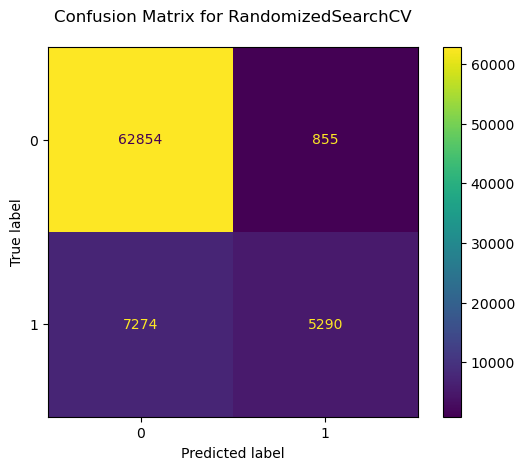


Classification Report for RandomizedSearchCV


              precision    recall  f1-score   support

           0       0.90      0.99      0.94     63709
           1       0.86      0.42      0.57     12564

    accuracy                           0.89     76273
   macro avg       0.88      0.70      0.75     76273
weighted avg       0.89      0.89      0.88     76273



Results for RandomizedSearchCV


Accuracy is: 0.89
ROC AUC is : 0.70
F1 Score is : 0.57

ROC Curve for RandomizedSearchCV




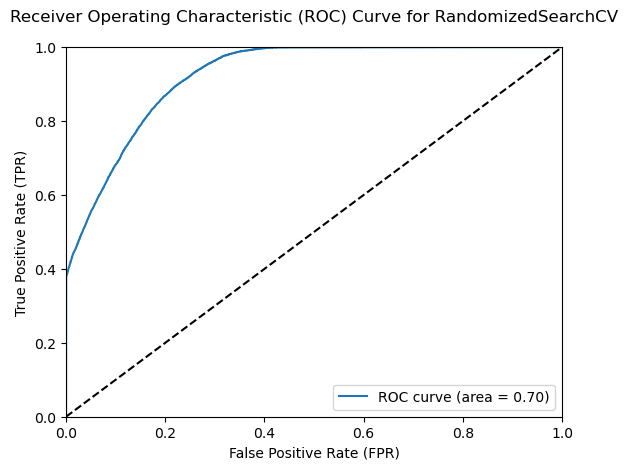

In [42]:
# Call the function record and plot the Confusion Matrix and ROC Curve

record_and_print_scores('RandomizedSearchCV', y_test, y_pred, y_pred_proba)

## Extra Tree Classifier

In [43]:
# Create a Extra Tree Classifier

extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, 
                                         criterion ='entropy', 
                                         max_features = 2)

# Fit the Model

extra_tree_forest.fit(X_train, y_train)

# Predict the results for the Test data
y_pred = extra_tree_forest.predict(X_test)

# Find the Prediction Probability of the Test data
y_pred_proba = extra_tree_forest.predict_proba(X_test)[:,1]

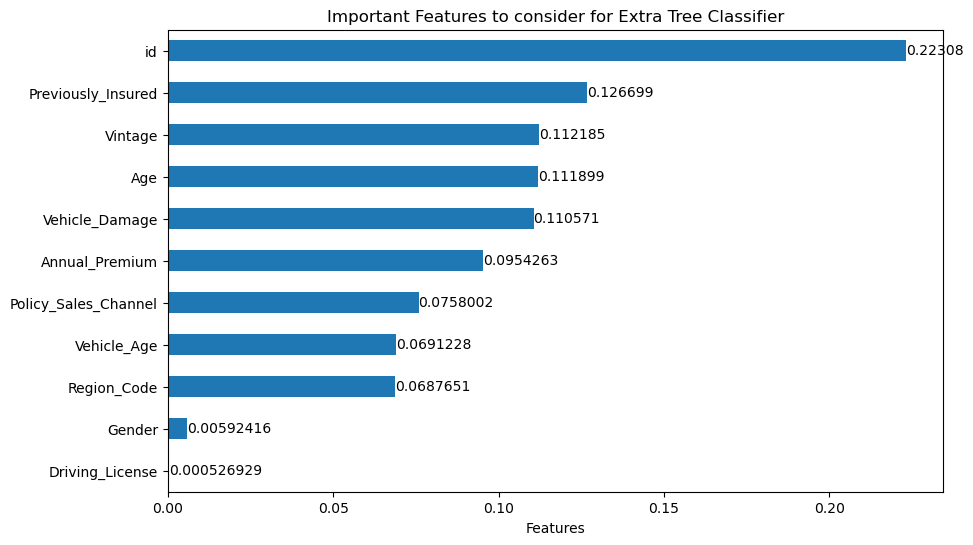

In [44]:
# Computing the importance of each feature

etc_feature_importance = extra_tree_forest.feature_importances_

# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(etc_feature_importance, 
                                index=X.columns).sort_values(ascending=True)

# Plot a simple bar chart
ax = feature_importances.plot(kind='barh', figsize=(10,6), grid=False)
ax.bar_label(ax.containers[0], color='black')
plt.title('Important Features to consider for Extra Tree Classifier')
plt.xlabel('Features')
plt.show()


Confusion Matrix for Extra Tree Classifier

True Negative  : 60372
False Positive : 3337
False Negative : 6264
True Positive  : 6300


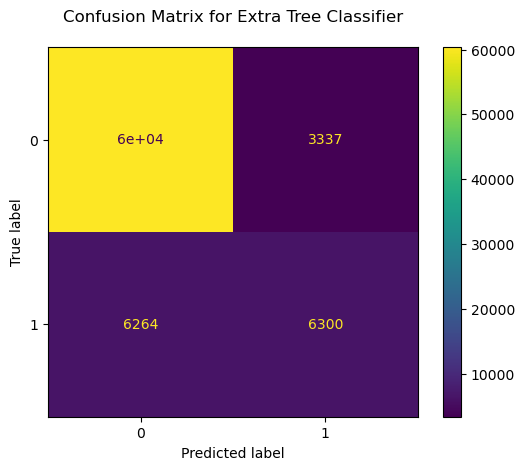


Classification Report for Extra Tree Classifier


              precision    recall  f1-score   support

           0       0.91      0.95      0.93     63709
           1       0.65      0.50      0.57     12564

    accuracy                           0.87     76273
   macro avg       0.78      0.72      0.75     76273
weighted avg       0.86      0.87      0.87     76273



Results for Extra Tree Classifier


Accuracy is: 0.87
ROC AUC is : 0.72
F1 Score is : 0.57

ROC Curve for Extra Tree Classifier




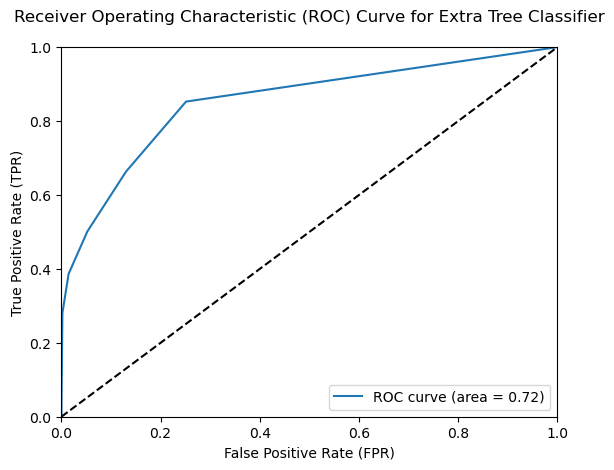

In [45]:
# Call the function record and plot the Confusion Matrix and ROC Curve

record_and_print_scores('Extra Tree Classifier', y_test, y_pred, y_pred_proba)

## Gaussian Naive Bayes model

In [47]:
# Create a Gaussian Classifier
gnb = GaussianNB()

# Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Find the Prediction Probability of the Test data
y_pred_proba = extra_tree_forest.predict_proba(X_test)[:,1]


Confusion Matrix for Gaussian Naive Bayes

True Negative  : 41345
False Positive : 22364
False Negative : 182
True Positive  : 12382


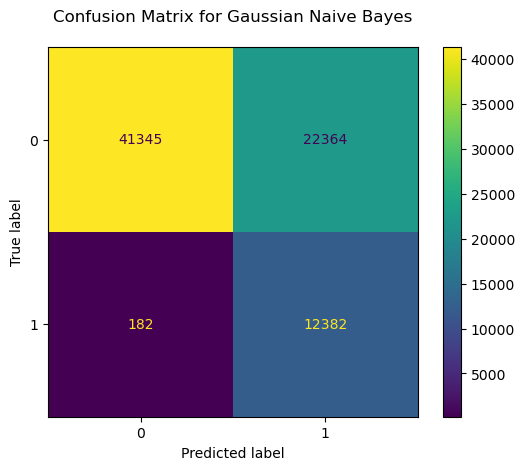


Classification Report for Gaussian Naive Bayes


              precision    recall  f1-score   support

           0       1.00      0.65      0.79     63709
           1       0.36      0.99      0.52     12564

    accuracy                           0.70     76273
   macro avg       0.68      0.82      0.65     76273
weighted avg       0.89      0.70      0.74     76273



Results for Gaussian Naive Bayes


Accuracy is: 0.70
ROC AUC is : 0.82
F1 Score is : 0.52

ROC Curve for Gaussian Naive Bayes




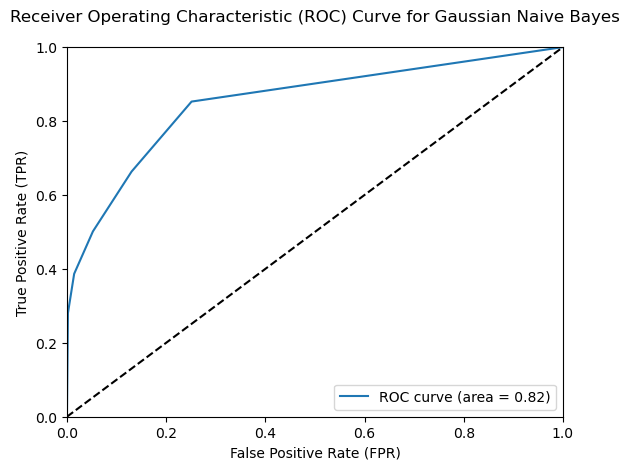

In [48]:
# Call the function record and plot the Confusion Matrix and ROC Curve

record_and_print_scores('Gaussian Naive Bayes', y_test, y_pred, y_pred_proba)

## Summarize Results in tabular format

In [49]:
# Let's define the dictionary of all the values we captured
# Then let's convert that into a Pandas DataFrame to view all the values in tabluar format

prediction_dict = {'Accuracy' : accuracy_values,
                'ROC AUC'  : roc_auc_values,
                'F1 Score' : f1_score_values}

dx = pd.DataFrame(prediction_dict,index=models)

#models = ['K-nearest neighbors','Linear Regression','Logistic Regression',
#         'Decision Tree Classifier','Random Forest Classifier',
#         'Randomized Search CV', 'Extra Tree Classifer','Gaussian Naive Bayes' ]

In [50]:
#Let's print the tabular form of all the models and its scores

pd.set_option('display.precision', 2)
dx

,Accuracy,ROC AUC,F1 Score
K Nearest Neighbor with K=2,0.88,0.69,0.53
Logistic Regression,0.88,0.70,0.54
Decision Tree Classifier,0.85,0.74,0.56
Random Forest Classifier,0.89,0.70,0.57
RandomizedSearchCV,0.89,0.70,0.57
Extra Tree Classifier,0.87,0.72,0.57
Gaussian Naive Bayes,0.70,0.82,0.52


## Conclusion: 

Based on the values from the ROC AUC, F1 Score, and Accuracy scores, we find that most models have an accuracy score between 85% and 89%. The best results came from Randomized Search CV with the best hyperparameters: {'max_depth': 13, 'n_estimators': 148}. 

The ROC AUC score for Gausssian Naive Bayes is the highest.

I would recommend using Random Foresgt Classifier with the hyperparameters: {'max_depth': 13, 'n_estimators': 148}. This will provide high accuracy.

When we perform supervised classification problem, we should ensure that:
- The independent variables must be unrelated to one another
- Large sample sizes are required for logistic regression

The only item we may have missed is around which feature was used. This is an item I plan to explore further 
- Only the variables that are relevant should be included


### Notes considered while working on the project:
The F1 score is calculated as the harmonic mean of the precision and recall scores, as shown below. It ranges from 0-100%, and a higher F1 score denotes a better quality classifier.

Accuracy scores are a metric used to evaluate the performance of classification models. The score ranges from 0 to 1, where 1 indicates perfect accuracy and 0 indicates complete failure. A score of over 90% is considered very good, while a score between 70% and 90% is considered good. However, depending on the model objectives, good accuracy may demand 99% accuracy and up.

AUC-ROC **“Area Under the Curve” (AUC) of the “Receiver Operating Characteristic” (ROC)** score shows how well the classifier distinguishes positive and negative classes. It can take values from 0 to 1. A higher ROC AUC indicates better performance. A perfect model would have an AUC of 1, while a random model would have an AUC of 0.5.

TPR - True Positive Rate (aka Recall or Sensitivity) measures the percentage of actual positives that have been correctly identified as positives.

FPR - False Positive Rate measures the percentage of actual negatives that have been incorrectly predicted as positives.

References: 

https://towardsdatascience.com/intuition-behind-roc-auc-score-1456439d1f30

https://www.analyticsvidhya.com/blog/2021/10/building-an-end-to-end-logistic-regression-model/

https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html

https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

https://www.analyticsvidhya.com/blog/2019/09/everything-know-about-p-value-from-scratch-data-science/

https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/

## Two Key Observations

While reviewing all the features, I found two key observations. 

1. Policy Sales Channel:  There is a spike in the number of customers using the a specific Policy Sales Channel (channel 152). It would be benefitial for the insurance company to explore this further. Maybe the insurance company is successful in getting customers to sign up using this channel.

2. Region Code: I also found that a large population of customers are from Region Code 28. I recommend the insurance company to find out what's special around Region Code 28. Maybe these customers are looking for insurance or the agency is doing a good job in this region. 

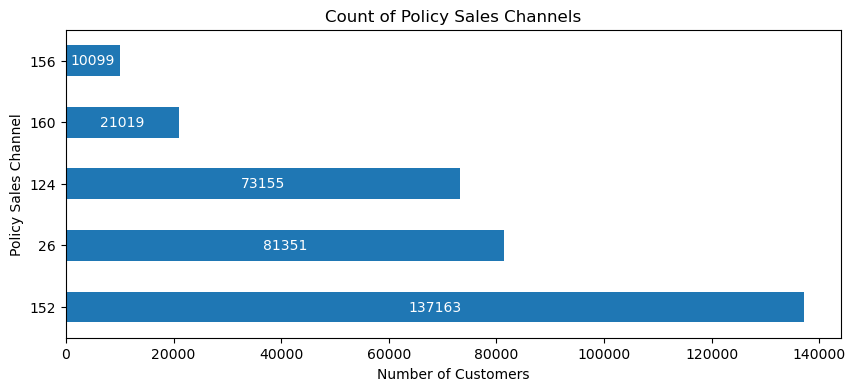

In [51]:
temp = df_train.groupby(['Policy_Sales_Channel'])['Policy_Sales_Channel'].count().sort_values(ascending=False)
temp.index = temp.index.astype(int)

ax = temp.head(5).plot(kind='barh', figsize=(10,4), grid=False)
ax.bar_label(ax.containers[0], label_type='center', color='white')
plt.title('Count of Policy Sales Channels')
plt.xlabel('Number of Customers')
plt.ylabel('Policy Sales Channel')
plt.show()

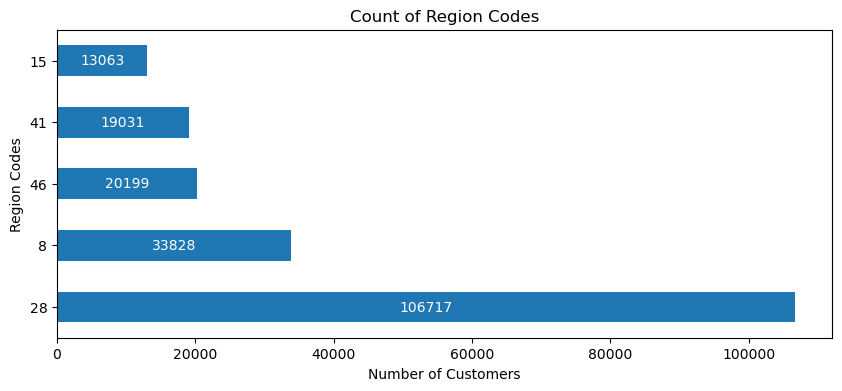

In [52]:
temp = df_train.groupby(['Region_Code'])['Region_Code'].count().sort_values(ascending=False)
temp.index = temp.index.astype(int)

ax = temp.head(5).plot(kind='barh', figsize=(10,4), grid=False)
ax.bar_label(ax.containers[0], label_type='center', color='white')
plt.title('Count of Region Codes')
plt.xlabel('Number of Customers')
plt.ylabel('Region Codes')
plt.show()